In [10]:
import numpy as np
import matplotlib.pylab as plt

def update_annot(ind):
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos

    print(pos)
    text = " ID:   {}\n pH:  {} \n IMF: {}".format("  ".join([str(names[n]) for n in ind["ind"]])," ".join(list(map(str,IMF[ind["ind"]])))," ".join(list(map(str,pH[ind["ind"]]))), )
    annot.set_text(text)
    annot.get_bbox_patch().xy = (40,4)
    annot.get_bbox_patch().set_facecolor(cmap(norm(c[ind["ind"][0]])))
    annot.get_bbox_patch().set_alpha(0.5)
    
def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()

<IPython.core.display.Javascript object>


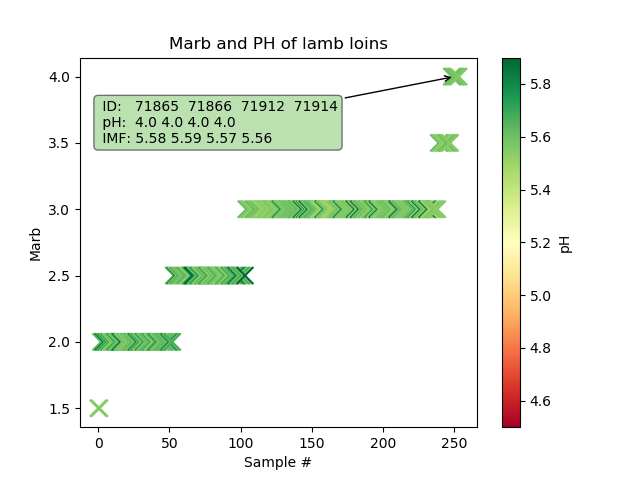

In [11]:
%matplotlib notebook
%config InlineBackend.figure_format = 'svg'
data = np.genfromtxt('pH_Mar_measured.csv', dtype=None, delimiter=',', names=True)
data.sort(order = 'Marb')

ID = data['ID']
IMF = data['Marb']
pH = np.around(data['pH'],4)
names = ID
cmap = plt.cm.RdYlGn
c = pH
norm = plt.Normalize(4.5,5.9)

x = np.arange(0, len(ID))
fig,ax = plt.subplots()
plt.title('Marbling and PH of lamb loins')
plt.ylabel('Marbling Grade')
plt.xlabel('Sample #')
sc = plt.scatter(x,IMF,c=c, s=150, cmap=cmap, norm=norm, marker = 'x')
cbar = plt.colorbar(sc)
cbar.set_label('pH')
annot = ax.annotate("", xy=(0,0), xytext=(0,3.5),
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

fig.canvas.mpl_connect("motion_notify_event", hover)

plt.show()


<IPython.core.display.Javascript object>


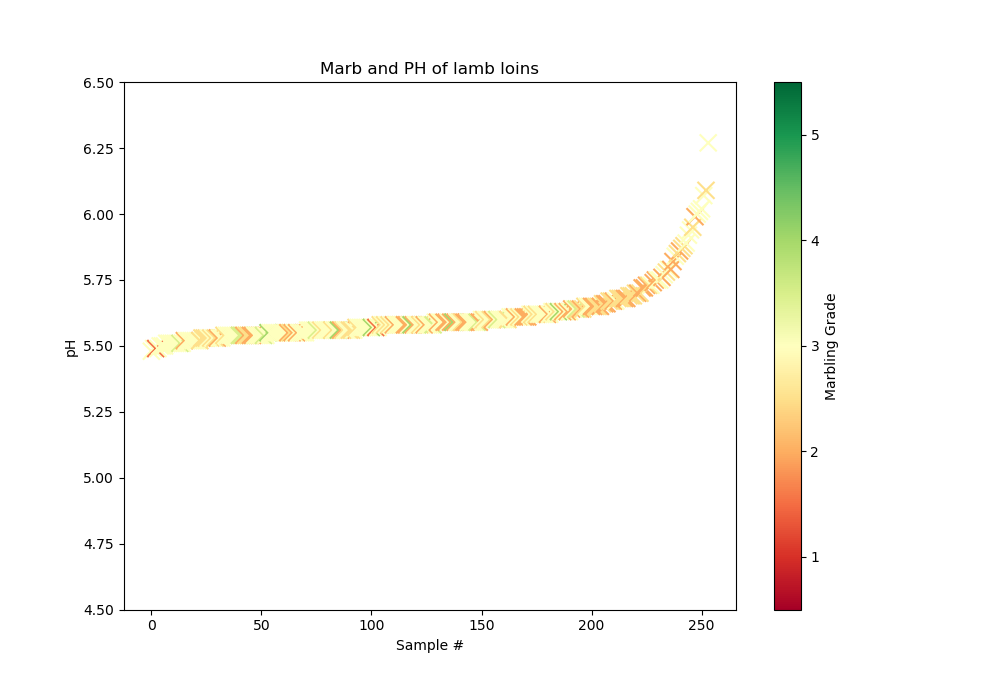

In [12]:
%matplotlib notebook
%config InlineBackend.figure_format = 'svg'

data.sort(order = 'pH')

ID = data['ID']
Marb = data['Marb']
pH = np.around(data['pH'],3)
names = ID
cmap = plt.cm.RdYlGn
norm = plt.Normalize(0.5,5.5)

x = np.arange(0, len(ID))
fig,ax = plt.subplots()
plt.title('Marbling and PH of lamb loins')
plt.ylabel('pH')
plt.xlabel('Sample #')
sc = plt.scatter(x,pH,c=Marb, s=150, cmap=cmap, norm=norm, marker = 'x')
plt.ylim(4.5,6.5)
cbar = plt.colorbar(sc)
cbar.set_label('Marbling Grade')
annot = ax.annotate("", xy=(0,0), xytext=(0,5.75),
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"),horizontalalignment='left')
annot.set_visible(False)

fig.canvas.mpl_connect("motion_notify_event", hover)

plt.show()